# 01_Data_Visualization_XYZ(Quadril x Joelho)

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Descrever com clareza qual o objetivo desse notebook.

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Importando as Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [4]:
# Pegando apenas a 23 coluna para fazer o data frame 
# Adicionando um Header para a coluna  
df = pd.read_csv("../../data/Volt(8)/Voluntário 6_Ex1.csv",skiprows=1,header=None) 
#df.columns =["STS_JOELHO_X"]  
print(df.head())

         0         1         2         3        4        5      6         7   \
0  1258.260 -0.047852  0.931641  0.141602  0.34375  0.46875 -0.250  0.041992   
1  1258.276 -0.047852  0.931641  0.141602  0.34375  0.46875 -0.250  0.041992   
2  1258.310 -0.047852  0.931641  0.141602  0.34375  0.46875 -0.250  0.041992   
3  1258.343 -0.047852  0.931641  0.141602  0.34375  0.46875 -0.250  0.041992   
4  1258.377  0.095703  0.951172  0.245117 -1.12500  0.28125 -0.625  0.113281   

         8         9   ...        15       16       17       18      19  \
0  0.493164  0.839844  ...  0.759766 -9.71875 -6.53125  3.90625  115.14   
1  0.493164  0.839844  ...  0.759766 -9.71875 -6.53125  3.90625  115.14   
2  0.493164  0.839844  ...  0.759766 -9.71875 -6.53125  3.90625  115.14   
3  0.493164  0.839844  ...  0.759766 -9.71875 -6.53125  3.90625  115.14   
4  0.468750  0.862305  ...  0.759766 -9.71875 -6.53125  3.90625  115.14   

         20        21        22        23        24  
0  110.1599  2

In [5]:
df.info()
print(df.isnull().sum())  # Quantidade de valores nulos
df.describe()
# Descrição estatistica da coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       984 non-null    float64
 1   1       984 non-null    float64
 2   2       984 non-null    float64
 3   3       984 non-null    float64
 4   4       984 non-null    float64
 5   5       984 non-null    float64
 6   6       984 non-null    float64
 7   7       984 non-null    float64
 8   8       984 non-null    float64
 9   9       984 non-null    float64
 10  10      984 non-null    float64
 11  11      984 non-null    float64
 12  12      984 non-null    float64
 13  13      984 non-null    float64
 14  14      984 non-null    float64
 15  15      984 non-null    float64
 16  16      984 non-null    float64
 17  17      984 non-null    float64
 18  18      984 non-null    float64
 19  19      984 non-null    float64
 20  20      984 non-null    float64
 21  21      984 non-null    float64
 22  22

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,1274.634809,0.010910,0.789328,-0.469133,-0.248412,-0.366267,0.001683,0.052621,0.500080,0.702638,...,-0.289197,1.511147,-0.413459,-0.428608,117.302274,124.897998,214.251833,173.237503,131.744425,129.846446
std,9.472435,0.096764,0.159210,0.330638,32.572638,6.347233,5.444975,0.094698,0.342735,0.373022,...,0.275800,12.581464,7.388163,4.084531,24.577914,56.913141,13.447159,7.420597,37.912636,32.915355
min,1258.260000,-0.230469,0.349609,-1.125977,-95.218750,-18.750000,-27.000000,-0.203125,0.021484,-0.180664,...,-0.601562,-21.250000,-19.250000,-15.687500,93.048510,54.012490,187.858800,160.635500,1.016873,53.087700
25%,1266.429500,-0.047852,0.651367,-0.742188,-27.468750,-2.937500,-1.593750,-0.020508,0.179688,0.434570,...,-0.415039,-3.968750,-4.343750,-2.593750,96.682680,66.895720,202.456800,169.227300,127.296700,116.987100
50%,1274.648500,0.018555,0.818359,-0.470703,-0.062500,-0.187500,-0.250000,0.051758,0.407227,0.898926,...,-0.346680,-0.062500,-0.625000,-0.406250,106.519000,110.127500,220.733000,170.903600,140.256200,118.938900
75%,1282.818250,0.071289,0.910156,-0.241211,22.187500,2.187500,2.187500,0.119141,0.894531,0.976562,...,-0.278320,4.812500,2.265625,1.312500,136.259800,187.267000,224.998500,175.455600,150.217800,136.379800
max,1291.019000,0.238281,1.082031,0.284180,72.875000,26.093750,26.781250,0.465820,1.096680,1.189453,...,0.759766,79.500000,39.000000,12.875000,168.484000,201.001500,233.038700,193.025800,167.372900,217.037200


In [6]:
# Contar valores ausentes
print("Valores nulos:", df.isnull().sum())

# Contar valores duplicados
print("Valores duplicados:", df.duplicated().sum())


Valores nulos: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64
Valores duplicados: 0


# Criação de Index temporal

In [7]:
# Criando uma coluna de tempo (considerando que a 1ª linha é o tempo 0s)]

# Definindo essa coluna como o índice do DataFrame

df["Tempo (s)"] = np.arange(len(df)) / 30

df.set_index("Tempo (s)", inplace=True)

# Visualizando os dados após a conversão
print(df.head())

#Usando isso podemos ver que o exercicio vai ter no Total de .... 
print(df.tail())


                 0         1         2         3        4        5      6   \
Tempo (s)                                                                    
0.000000   1258.260 -0.047852  0.931641  0.141602  0.34375  0.46875 -0.250   
0.033333   1258.276 -0.047852  0.931641  0.141602  0.34375  0.46875 -0.250   
0.066667   1258.310 -0.047852  0.931641  0.141602  0.34375  0.46875 -0.250   
0.100000   1258.343 -0.047852  0.931641  0.141602  0.34375  0.46875 -0.250   
0.133333   1258.377  0.095703  0.951172  0.245117 -1.12500  0.28125 -0.625   

                 7         8         9   ...        15       16       17  \
Tempo (s)                                ...                               
0.000000   0.041992  0.493164  0.839844  ...  0.759766 -9.71875 -6.53125   
0.033333   0.041992  0.493164  0.839844  ...  0.759766 -9.71875 -6.53125   
0.066667   0.041992  0.493164  0.839844  ...  0.759766 -9.71875 -6.53125   
0.100000   0.041992  0.493164  0.839844  ...  0.759766 -9.71875 -6.53125 

# Separação de Quadril e Joelho 

### Seleção das colunas que contém os ângulos Quadril e Joelho (XYZ)

In [8]:

# Selecionar colunas de interesse
quadril_x = df.iloc[:, 19]
quadril_y = df.iloc[:, 20]
quadril_z = df.iloc[:, 21]
joelho_x = df.iloc[:, 22]
joelho_y = df.iloc[:, 23]
joelho_z = df.iloc[:, 24]

# Renomear colunas para facilitar análise
quadril_x.name = "Quadril X"
quadril_y.name = "Quadril Y"
quadril_z.name = "Quadril Z"
joelho_x.name = "Joelho X"
joelho_y.name = "Joelho Y"
joelho_z.name = "Joelho Z"

# Análise estatística individual
print("\nAnálise do Quadril:")
print(pd.DataFrame({quadril_x.name: quadril_x.describe(),
                    quadril_y.name: quadril_y.describe(),
                    quadril_z.name: quadril_z.describe()}))

print("\nAnálise do Joelho:")
print(pd.DataFrame({joelho_x.name: joelho_x.describe(),
                    joelho_y.name: joelho_y.describe(),
                    joelho_z.name: joelho_z.describe()}))




Análise do Quadril:
        Quadril X   Quadril Y   Quadril Z
count  984.000000  984.000000  984.000000
mean   117.302274  124.897998  214.251833
std     24.577914   56.913141   13.447159
min     93.048510   54.012490  187.858800
25%     96.682680   66.895720  202.456800
50%    106.519000  110.127500  220.733000
75%    136.259800  187.267000  224.998500
max    168.484000  201.001500  233.038700

Análise do Joelho:
         Joelho X    Joelho Y    Joelho Z
count  984.000000  984.000000  984.000000
mean   173.237503  131.744425  129.846446
std      7.420597   37.912636   32.915355
min    160.635500    1.016873   53.087700
25%    169.227300  127.296700  116.987100
50%    170.903600  140.256200  118.938900
75%    175.455600  150.217800  136.379800
max    193.025800  167.372900  217.037200


# Fazendo a Visualização de Dados

## Graficos dos Eixos X, Y e Z do Quadril e Joelho

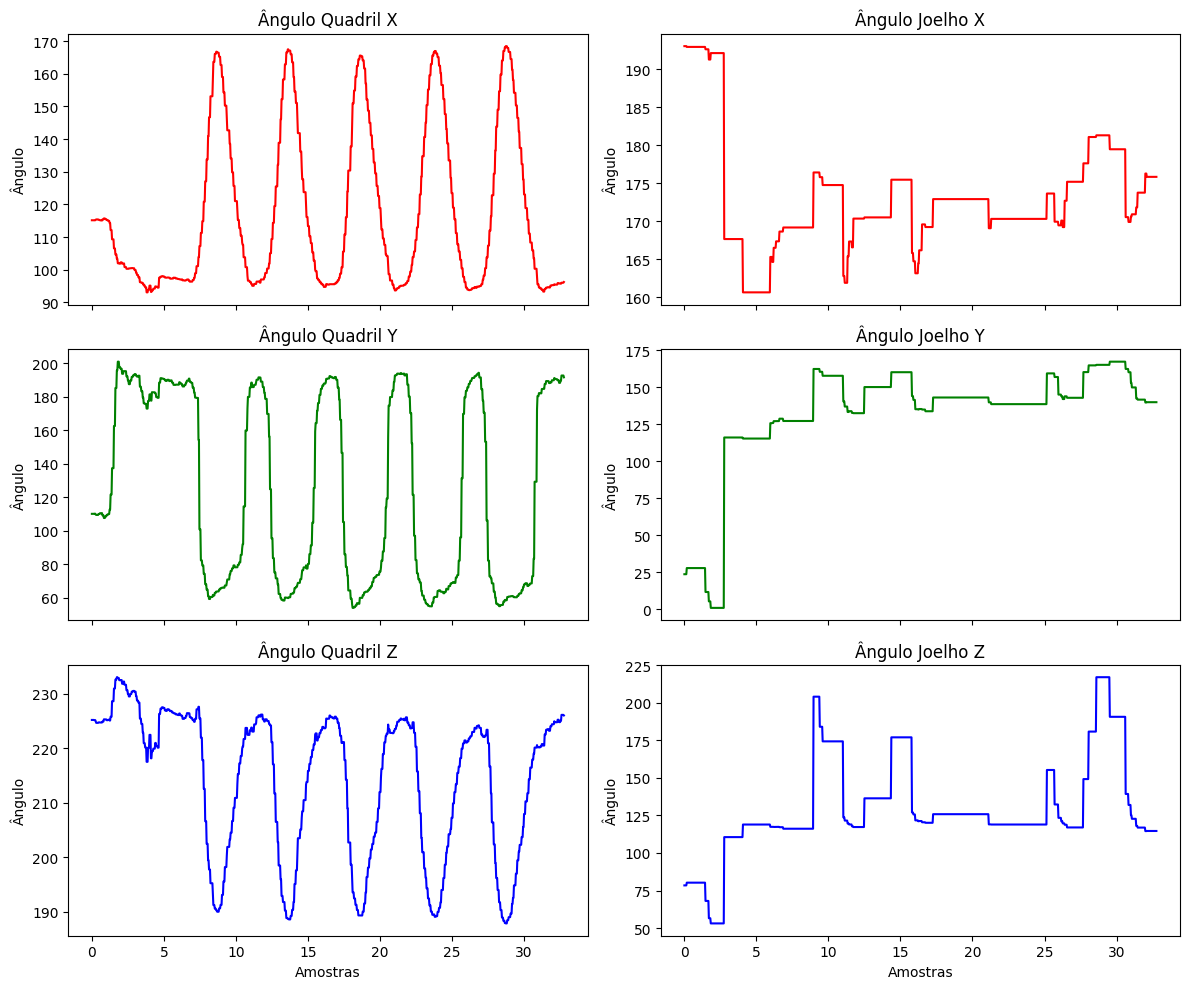

In [9]:
# Criar subplots 3x2 (3 linhas, 2 colunas)
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)

# Plot ângulos do quadril
axes[0, 0].plot(quadril_x, color="red")
axes[0, 0].set_title("Ângulo Quadril X")
axes[0, 0].set_ylabel("Ângulo")

axes[1, 0].plot(quadril_y, color="green")
axes[1, 0].set_title("Ângulo Quadril Y")
axes[1, 0].set_ylabel("Ângulo")

axes[2, 0].plot(quadril_z, color="blue")
axes[2, 0].set_title("Ângulo Quadril Z")
axes[2, 0].set_xlabel("Amostras")
axes[2, 0].set_ylabel("Ângulo")

# Plot ângulos do joelho
axes[0, 1].plot(joelho_x, color="red")
axes[0, 1].set_title("Ângulo Joelho X")
axes[0, 1].set_ylabel("Ângulo")

axes[1, 1].plot(joelho_y, color="green")
axes[1, 1].set_title("Ângulo Joelho Y")
axes[1, 1].set_ylabel("Ângulo")

axes[2, 1].plot(joelho_z, color="blue")
axes[2, 1].set_title("Ângulo Joelho Z")
axes[2, 1].set_xlabel("Amostras")
axes[2, 1].set_ylabel("Ângulo")

plt.tight_layout()
plt.show()

É possível observar que os eixos X em ambos os gráficos apresentam grande oscilação, tornando sua utilização para a análise de compensação de movimento mais desafiadora.

## Graficos dos Eixos X, Y e Z do Quadril com o index temporal

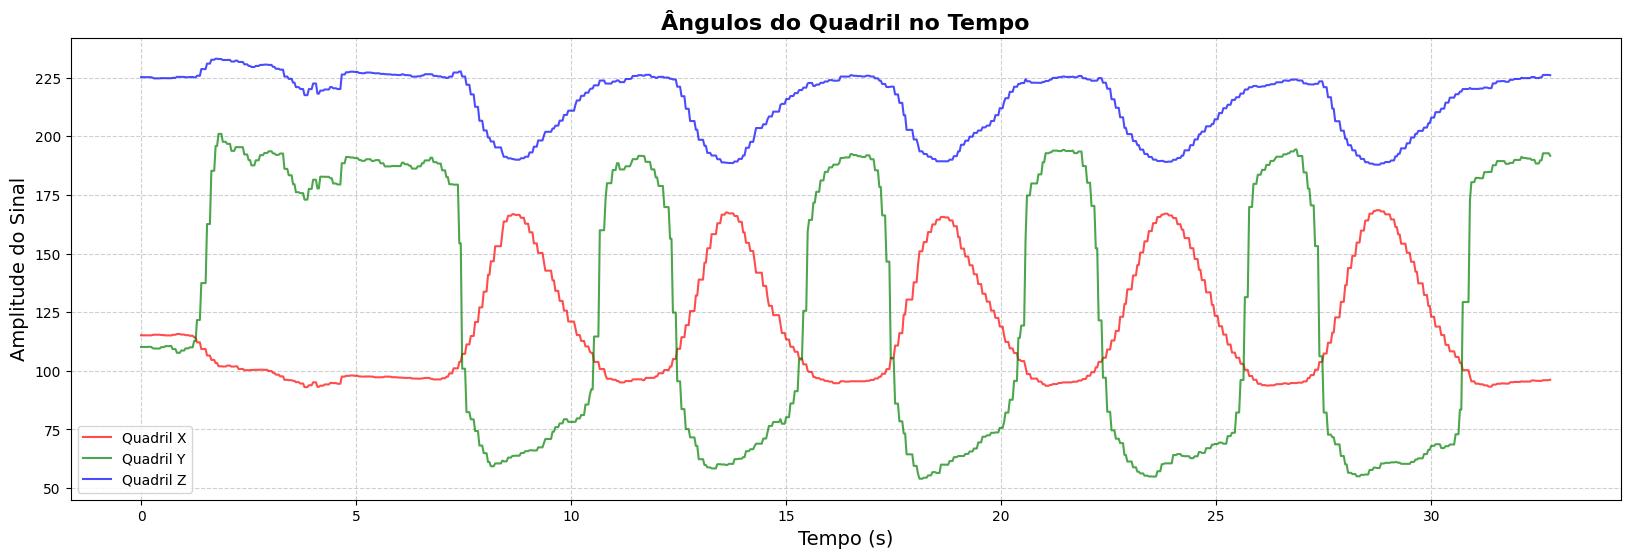

In [10]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, quadril_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, quadril_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, quadril_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.

## Graficos dos Eixos X, Y e Z do Joelho com o index temporal

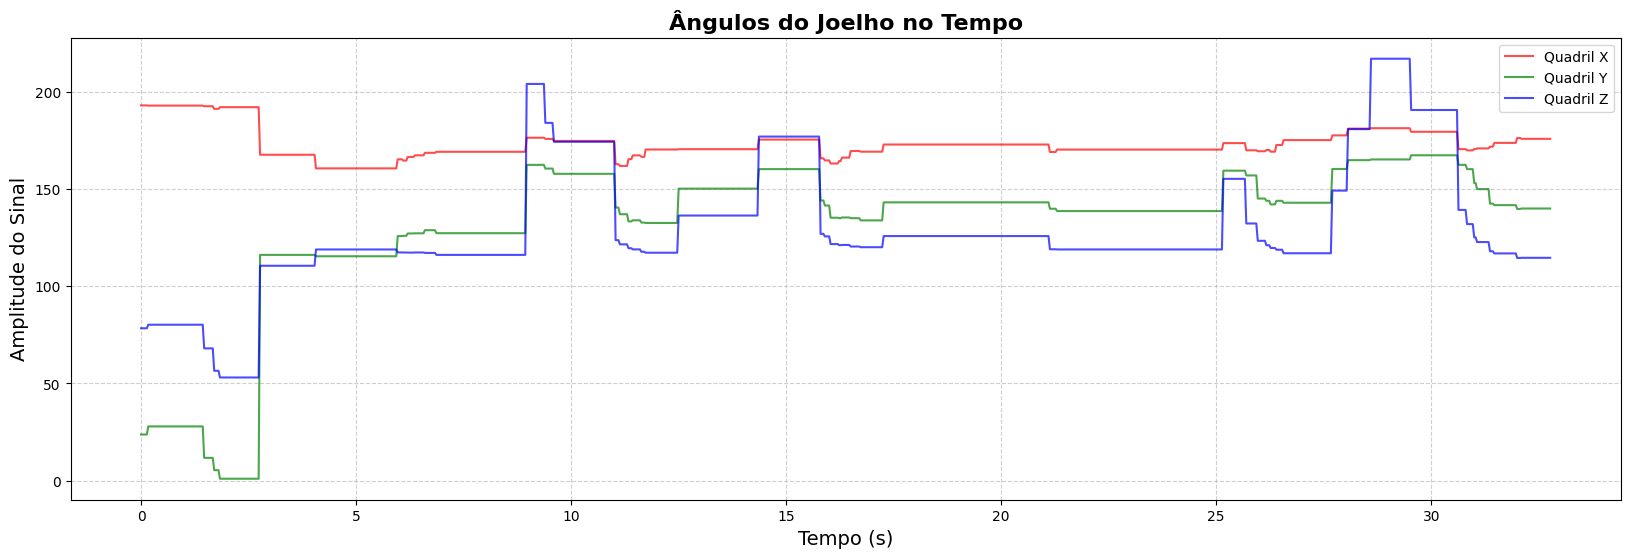

In [11]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, joelho_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, joelho_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, joelho_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.









## Grafico do Quadril e Joelho junto 

<Figure size 640x480 with 0 Axes>

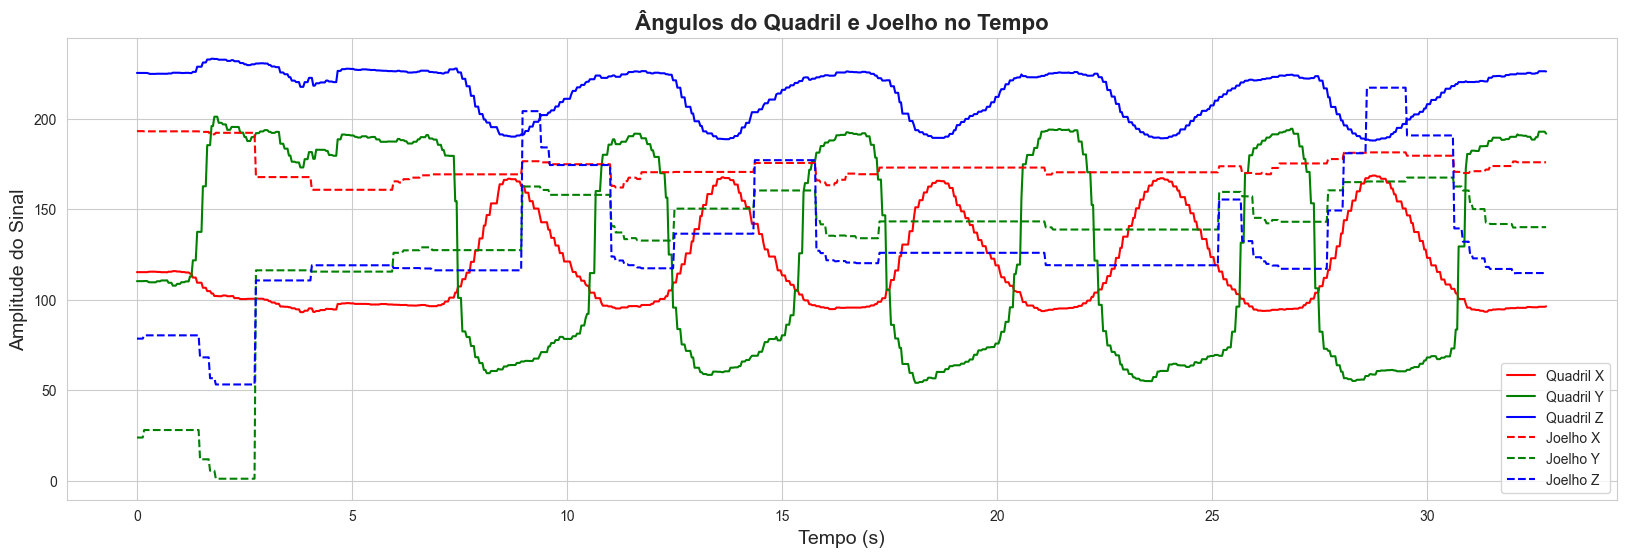

In [12]:

plt.clf()
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df.index, y=quadril_x, color='red', label="Quadril X")
sns.lineplot(x=df.index, y=quadril_y, color='green', label="Quadril Y")
sns.lineplot(x=df.index, y=quadril_z, color='blue', label="Quadril Z")

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df.index, y=joelho_x, color='red', linestyle="--", label="Joelho X")
sns.lineplot(x=df.index, y=joelho_y, color='green', linestyle="--", label="Joelho Y")
sns.lineplot(x=df.index, y=joelho_z, color='blue', linestyle="--", label="Joelho Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()

Identificação de que o joelho se movimenta primeiro que o quadril

## Manipulação do tempo para melhor visualização dos gráficos

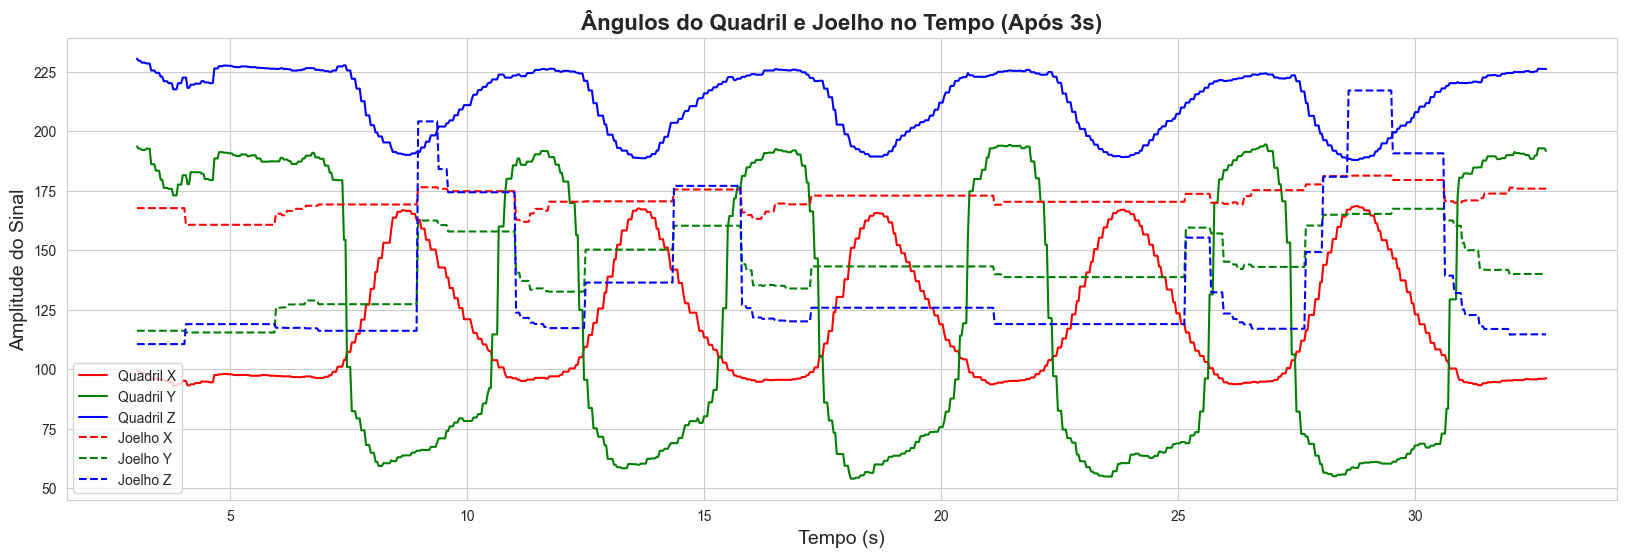

In [13]:


# Filtrar os dados para remover os primeiros 3 segundos
df_filtrado = df.loc[df.index > 3].copy() 

# Estilo do Seaborn para um visual mais profissional
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 19], color='red', label="Quadril X")  # Coluna 19ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 20], color='green', label="Quadril Y")  # Coluna 20ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 21], color='blue', label="Quadril Z")  # Coluna 21ª

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 22], color='red', linestyle="--", label="Joelho X")  # Coluna 22ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 23], color='green', linestyle="--", label="Joelho Y")  # Coluna 23ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 24], color='blue', linestyle="--", label="Joelho Z")  # Coluna 24ª

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo (Após 3s)", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()


# Conclusões

Ao longo deste teste, foi possível realizar uma análise detalhada dos ângulos do joelho e do quadril, tanto de forma individual quanto sincronizada. A separação clara dos eixos X, Y e Z permitiu uma avaliação mais precisa do comportamento de cada articulação ao longo do tempo. Além disso, identificou-se que os eixos X apresentaram maior oscilação, dificultando sua utilização na análise de compensação de movimento, enquanto os eixos Y e Z se mostraram mais estáveis e úteis para identificar variações. Dessa forma, a abordagem utilizada possibilitou uma melhor compreensão dos padrões de movimento e abre caminho para futuras investigações e aprimoramentos na análise biomecânica.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.